# ***Answer 1***

In [ ]:
import pandas as pd
Bike_Details = ("/content/BIKE DETAILS.csv")
bike_df = pd.read_csv(Bike_Details)
print("The first 10 row of BIke details")
print(bike_df.head(10))
print("The shape in BIke details")
print(bike_df.shape)
print("The column names in BIke details")
print(bike_df.columns)


The first 10 row of BIke details
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                N

# ***Answer 2***

In [ ]:
print("The missing values in all the columns:",bike_df.isnull().sum())

The missing values in all the columns: name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


In [ ]:
print("The percentage of the all the values in the all the columns:",(bike_df.isnull().sum()/len(bike_df))*100)

The percentage of the all the values in the all the columns: name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64


In [ ]:
bike_df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


In [ ]:
# so , the name,seller_type,owner are the categorical data .
# and selling_price,year,km_driven are numerical data
bike_df["name"] = bike_df["name"].fillna(bike_df["name"].mode()[0])
bike_df["seller_type"] = bike_df["seller_type"].fillna(bike_df["seller_type"].mode()[0])
bike_df["owner"] = bike_df["owner"].fillna(bike_df["owner"].mode()[0])

In [ ]:
bike_df["selling_price"] = bike_df["selling_price"].fillna(bike_df["selling_price"].median())
bike_df["year"] = bike_df["year"].fillna(bike_df["year"].median())
bike_df["km_driven"] = bike_df["km_driven"].fillna(bike_df["km_driven"].median())

In [ ]:
print("Missing value after the handling")
print(bike_df.isnull().sum())

Missing value after the handling
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


# ***Answer 3***

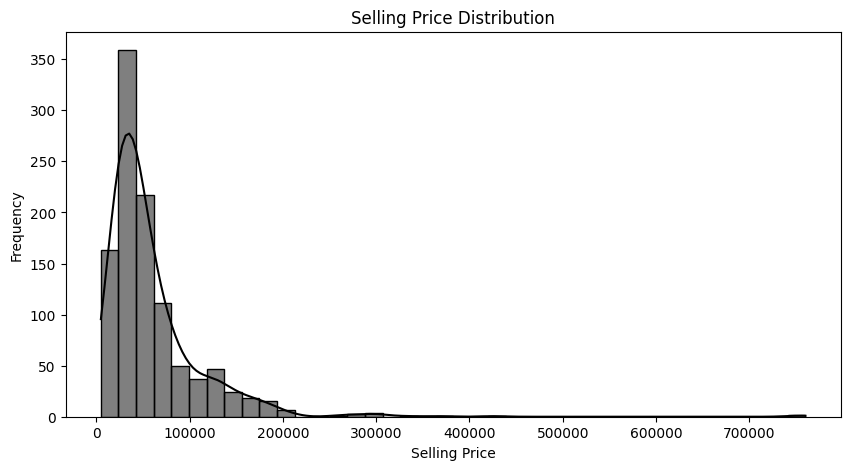

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
sns.histplot(bike_df["selling_price"],kde=True,color='black',bins = 40)
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Selling Price Distribution")
plt.show()

# ***Answer 4***

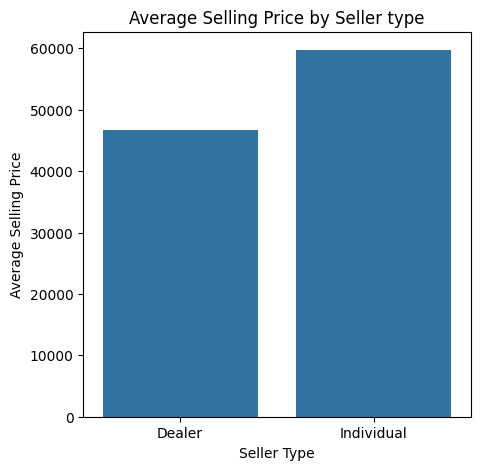

In [ ]:
BIKE_DETAILS_baby = bike_df.groupby("seller_type")["selling_price"].mean().reset_index()
plt.figure(figsize=(5,5))
sns.barplot(x="seller_type",y="selling_price",data=BIKE_DETAILS_baby)
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller type")
plt.show()

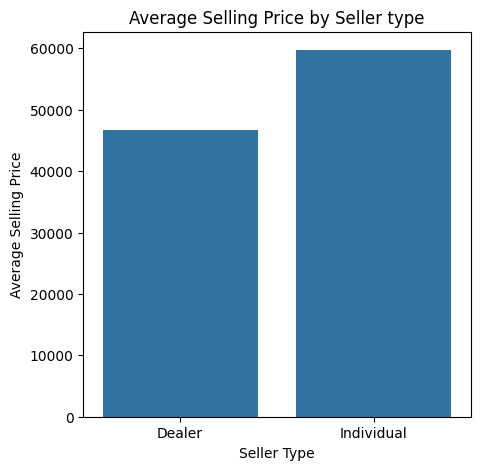

In [ ]:
BIKE_DETAILS_baby = bike_df.groupby("seller_type",as_index=False)["selling_price"].mean()
plt.figure(figsize=(5,5))
sns.barplot(x="seller_type",y="selling_price",data=BIKE_DETAILS_baby)
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller type")
plt.show()

# ***Answer 5***

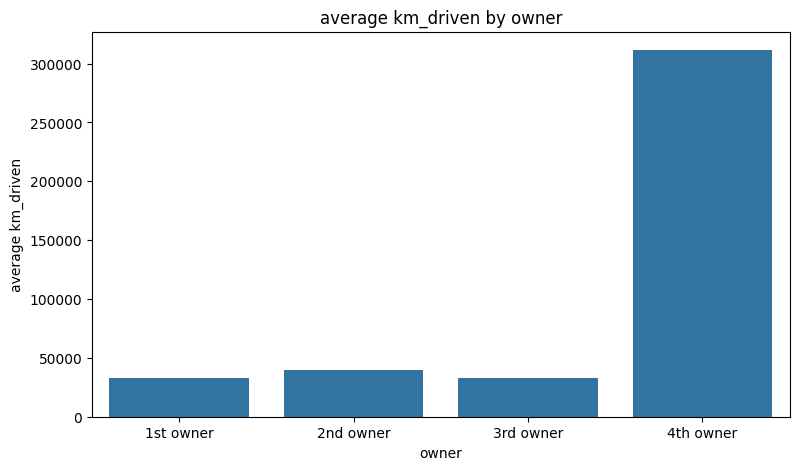

In [ ]:
BIKE_DETAILS_comeon = bike_df.groupby("owner",as_index=False)["km_driven"].mean()
plt.figure(figsize=(9,5))
sns.barplot(x="owner",y="km_driven",data=BIKE_DETAILS_comeon)
plt.xlabel("owner")
plt.ylabel("average km_driven")
plt.title("average km_driven by owner")
plt.show()

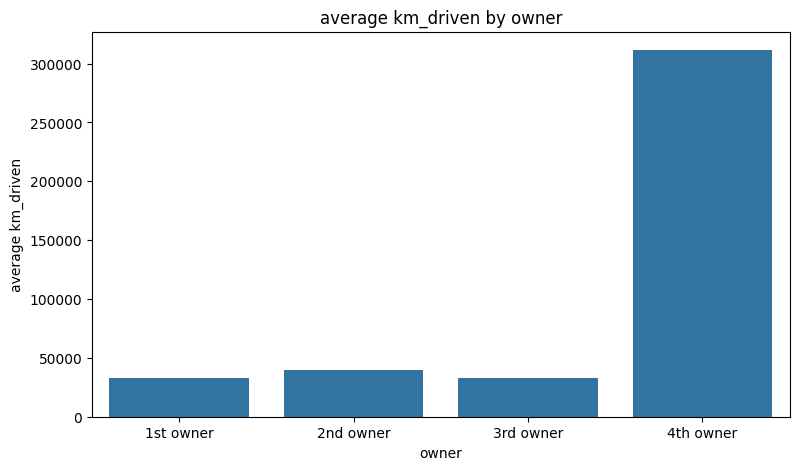

In [ ]:
BIKE_DETAILS_comeon = bike_df.groupby("owner")["km_driven"].mean().reset_index()
plt.figure(figsize=(9,5))
sns.barplot(x="owner",y="km_driven",data=BIKE_DETAILS_comeon)
plt.xlabel("owner")
plt.ylabel("average km_driven")
plt.title("average km_driven by owner")
plt.show()

# ***Answer 6***

In [ ]:
print("Before the detect and remove the outliers")
print(bike_df.describe())
Q1 = bike_df["km_driven"].quantile(0.25)
Q3 = bike_df["km_driven"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
bike_df = bike_df[(bike_df["km_driven"] >= lower_bound) & (bike_df["km_driven"] <= upper_bound)]
print("After the detect and remove the outliers")
print(bike_df.describe())

Before the detect and remove the outliers
       selling_price         year      km_driven  ex_showroom_price
count    1061.000000  1061.000000    1061.000000       6.260000e+02
mean    59638.151744  2013.867107   34359.833176       8.795871e+04
std     56304.291973     4.301191   51623.152702       7.749659e+04
min      5000.000000  1988.000000     350.000000       3.049000e+04
25%     28000.000000  2011.000000   13500.000000       5.485200e+04
50%     45000.000000  2015.000000   25000.000000       7.275250e+04
75%     70000.000000  2017.000000   43000.000000       8.703150e+04
max    760000.000000  2020.000000  880000.000000       1.278000e+06
After the detect and remove the outliers
       selling_price         year     km_driven  ex_showroom_price
count    1022.000000  1022.000000   1022.000000       6.070000e+02
mean    60810.166341  2014.014677  28203.415851       8.856537e+04
std     56868.037871     4.242962  19552.083583       7.856007e+04
min      5000.000000  1988.000000    

# ***Answer 7***

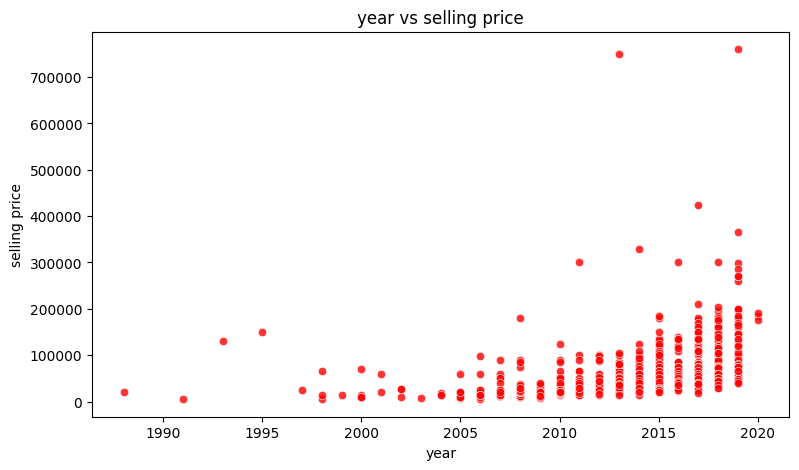

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(x="year",y="selling_price",data=bike_df,color="red",alpha = 0.8)
plt.xlabel("year")
plt.ylabel("selling price")
plt.title("year vs selling price")
plt.show()

# ***`*Answer 8*`***

In [ ]:
df_encoded = pd.get_dummies(bike_df,columns=["seller_type"],drop_first=False)
print(df_encoded.head())
#The reason no numerical values appear in the one-hot encoded columns is usually because the column seller_type:
#1. extra spaces in its values (e.g., "Dealer " instead of "Dealer").
# 2.Contains NaN / missing values.
# 3.Is not of type object or category (rare, but possible if it’s numeric already).

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


# ***Answer 9***

In [34]:
bike_df.dtypes

,0
name,object
selling_price,int64
year,int64
seller_type,object
owner,object
km_driven,int64
ex_showroom_price,float64


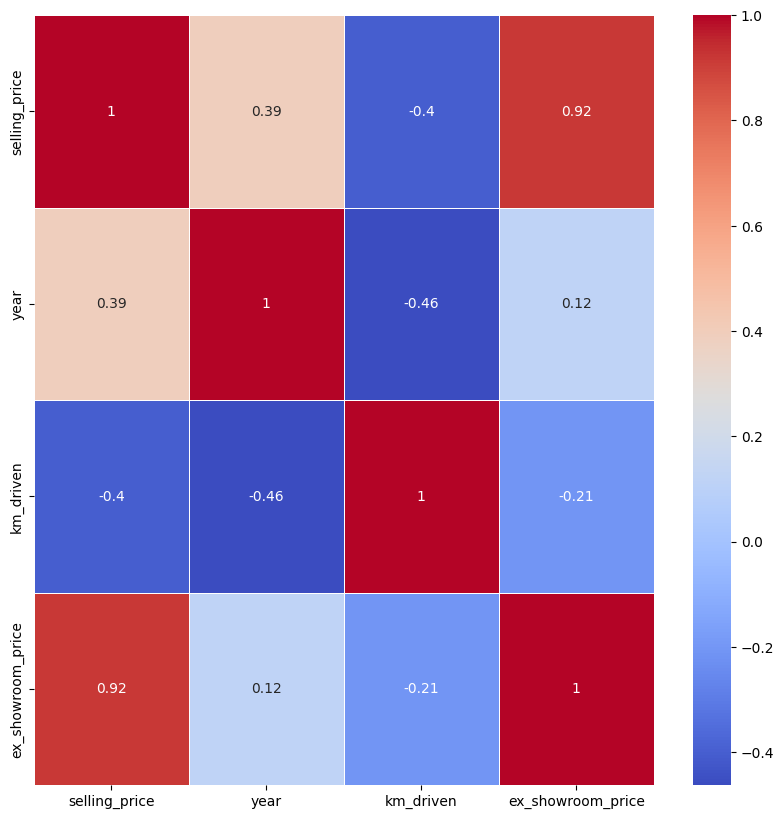

In [39]:
numerical_value=bike_df.select_dtypes(include=["int64","float64"])
correlational_value=numerical_value.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlational_value,annot=True,cmap="coolwarm",linewidths=0.5)
plt.show()


# ***Answer 10***